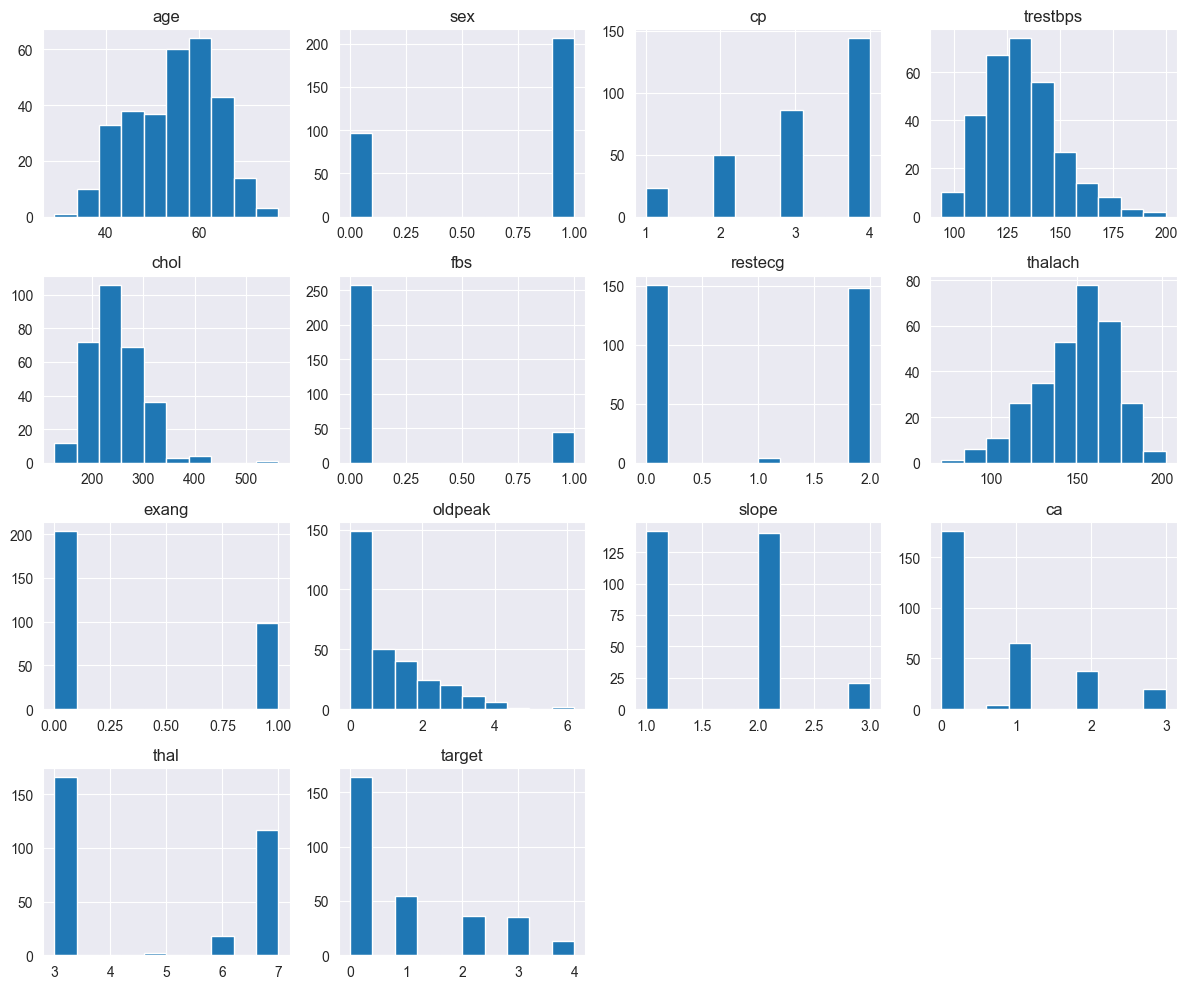

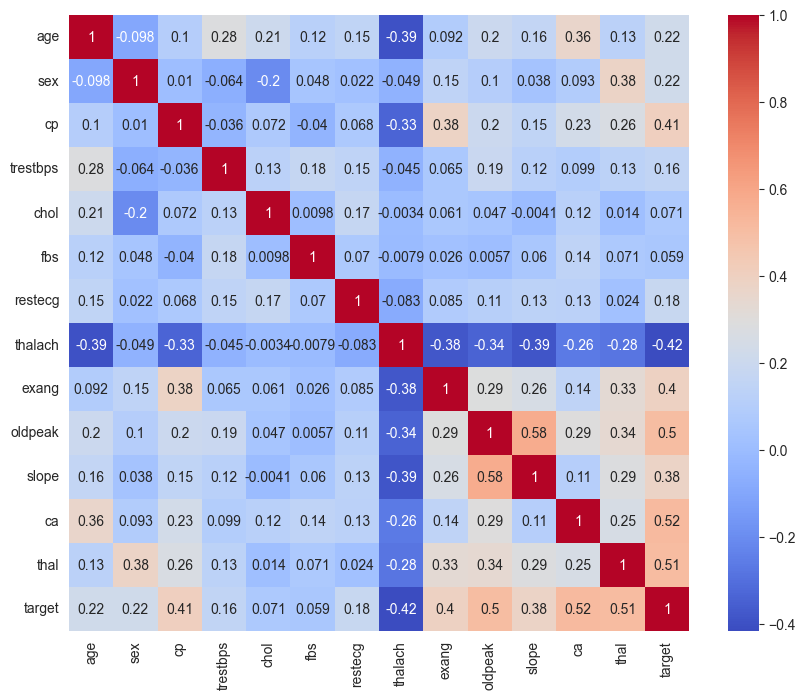

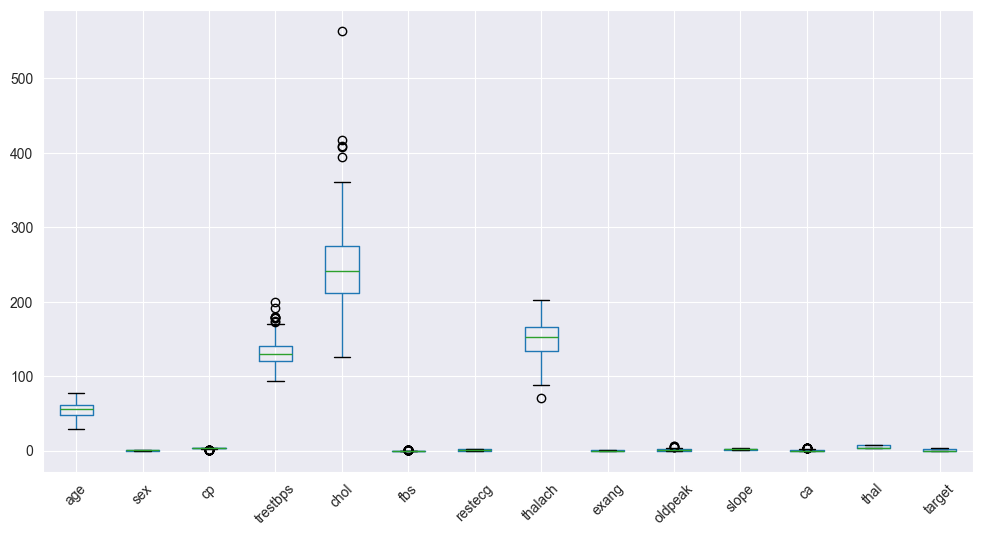

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
import os

# التأكد من وجود المجلدات
os.makedirs('../results/evaluation', exist_ok=True)
os.makedirs('../data', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# تحميل البيانات
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# معالجة القيم المفقودة
data = data.replace('?', np.nan)
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
data = data.fillna(data.mean())

# تحديد السمات
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# أنبوب معالجة
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# تطبيق المعالجة
data_processed = preprocessor.fit_transform(data.drop('target', axis=1))
feature_names = (numeric_features +
                 preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())
data_processed = pd.DataFrame(data_processed, columns=feature_names)

# حفظ preprocessor
joblib.dump(preprocessor, '../models/preprocessor.pkl')

# تحليل استكشافي
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('../results/evaluation/histograms.png')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.savefig('../results/evaluation/correlation_heatmap.png')
plt.show()

plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.savefig('../results/evaluation/boxplots.png')
plt.show()

# حفظ البيانات المعالجة
data_processed.to_csv('../data/processed_heart_disease.csv', index=False)